Examples from the book series visual quantum mechanics. by Bernd Thaller <br>
<br> 
Modified    By    Reason <br> 
--------    ---   ------ <br>
12-Aug-23.  CBL.  Original <br> 
<hr> 
References: <br> 
https://stackoverflow.com/questions/37520251/plotting-hsv-values-with-imshow <br>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import matplotlib.colors as mcolors

In [ ]:
def G(x, y):
    s = x + 1j*y
    return (s+2)/(s**2 + s + 1)

In [20]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

xx, yy = np.meshgrid(x, y)
norm = mcolors.Normalize()
zz = G(xx, yy)
phase = np.angle(zz)
mag = np.abs(zz)

# color converter
c = mcolors.ColorConverter().to_rgb
# Custom rgb Colormap   ---- This does not work
rgb = make_colormap(
    [c('red'), c('yellow'), 0.33, c('yellow'), c('green'), c('cyan'), 0.5, c('cyan'),
     c('blue'), c('magenta'), 0.833, c('magenta'), c('red')])

# Turn data points into rgb values
z_data_rgb = rgb(norm(phase))
# normalizing the intensity values
intensity = norm(mag)

# defining light source
ls = mcolors.LightSource()

# plotting
plt.imshow(ls.blend_hsv(z_data_rgb, intensity), extent=[-3, 3, -3, 3])
plt.show()

NameError: name 'make_colormap' is not defined

In [21]:
def complex_to_hsv1(zz):
    """
    input a complex number and return an hsv value
    @param zz input complex value, assume a square matrix
    This is going to be fed into hsv_to_rgb which claims that each input is bound between 0:1
    """
    if (zz.ndim>1):
        n1 = zz.shape[0]
        n2 = zz.shape[1]
        n3 = 3
        rv = np.zeros([n1,n2,3])
        # angle has range (-pi:pi) add pi
        hue = np.angle(zz) + np.pi
        rv[:,:,0]  = hue/np.max(hue)
        saturation = np.absolute(zz)
        rv[:,:,1]  = saturation/np.max(saturation)
        rv[:,:,2]  = 1.0
        #print(rv[:,:,1])
    else:
        ## This part does not work. A single value does not have a dimension
        rv[0] = np.angle(zz)     # hue, angle in radians {0:2pi}
        rv[1] = np.absolute(zz)  # magnitude of complex number {0:1}
        rv[2] = 1.0              # normalize value to {0:1}, I don't quite know how to determine the normalization
    return rv

In [26]:
def complex_to_rgb(zz):
    """
    input a complex number and return an rgb value
    @param zz input complex value, assume a square matrix
    This is going to be fed into hsv_to_rgb which claims that each input is bound between 0:1
    """
    norm   = mcolors.Normalize()
    if (zz.ndim>1):
        n1 = zz.shape[0]
        n2 = zz.shape[1]
        n3 = 3
        rv = np.zeros([n1,n2,3])
        # angle has range (-pi:pi) 
        hue = np.angle(zz)
        rv[:,:,0]  =  norm(hue)
        saturation = np.absolute(zz)
        rv[:,:,1]  = norm(saturation)
        rv[:,:,2]  = 1.0
    return hsv_to_rgb(rv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


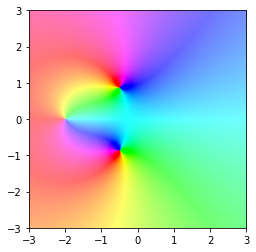

In [23]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

xx, yy = np.meshgrid(x, y)
zz     = G(xx, yy)
phase  = np.angle(zz)
mag    = np.abs(zz)
rv     = np.zeros([n,n,3])

# color converter
#c      = mcolors.ColorConverter().to_rgb
norm   = mcolors.Normalize()

# Turn data points into rgb values
rv[:,:,0] = norm(phase)            # hue
# normalizing the intensity values
rv[:,:,1] = norm(mag)              # saturation gives minus values in some instances
rv[:,:,2] = 1.0                    # value

rgb = hsv_to_rgb(rv)
#i,j = np.where(rgb[:,:,1]<0)
#print(i," ", j, rv[i,j,1]," ", mag[i,j])
#print(rgb)
# plotting
plt.imshow(rgb, extent=[-3, 3, -3, 3])
plt.show()

This kinda works, but there are some values in saturation that go negative. Don't quite understand why

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


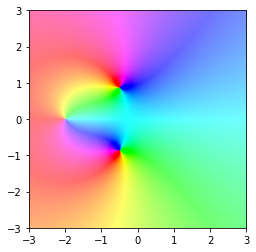

In [29]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

xx, yy = np.meshgrid(x, y)
zz     = G(xx, yy)
rgb     = complex_to_rgb(zz)
# plotting
plt.imshow(rgb, extent=[-3, 3, -3, 3])
plt.show()